In [12]:
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, load_model
from tensorflow.keras import Input
from tensorflow.keras.layers import Flatten,Conv2D,Dense,Dropout, MaxPooling2D, Average
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import TopKCategoricalAccuracy
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications.efficientnet_v2 import EfficientNetV2S
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet import ResNet101
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.resnet_v2 import ResNet50V2

### Loading data

In [2]:
path = "../DATA/Dataset 1-dermnet"
target = (224,224)
batches = 256
gen = ImageDataGenerator(rescale = 1/255.0, validation_split = 0.2)
train = gen.flow_from_directory(path + "/train",
                                target_size = target,
                                batch_size=batches,
                                seed = 106,
                                
                                class_mode="categorical",
                                subset = "training"
                               )
val = gen.flow_from_directory(path + "/train",
                                target_size = target,
                                batch_size=batches,
                                seed = 106,
                                class_mode="categorical",
                                subset = "validation"
                               )
gen = ImageDataGenerator(rescale = 1/255.0,)
test = gen.flow_from_directory(path + "/test",
                               target_size = target,
                               batch_size=batches,
                               seed = 106,
                               class_mode="categorical",
                               )

Found 12453 images belonging to 23 classes.
Found 3104 images belonging to 23 classes.
Found 4002 images belonging to 23 classes.


## Defining a plot function

In [3]:
import matplotlib.pyplot as plt
def plot(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title("Model accuracy")
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['train', 'val'], loc = "lower right")
    plt.show()
    
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title("Model loss")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['train', 'val'], loc = "lower right")
    plt.show()
    
    accuracy = round(history.history['accuracy'][-1],4)
    validation_accuracy = round(history.history['val_accuracy'][-1],4)
    return (accuracy, validation_accuracy)

### Model and its history saving function

In [4]:
saves_path = "/Users/praksj/Documents/VIT/Year-3/sem 6/TARP/DATA/dermnet_saves/"
def saver(model, history, model_name):
    hist_df = pd.DataFrame(history.history) 
    hist_csv_file = saves_path + "history/"+ model_name + '.csv'
    with open(hist_csv_file, mode='w') as f:
        hist_df.to_csv(f)
    model
    model.save(saves_path+"/models/"+model_name +".h5")
    

### Training mobilenet

In [14]:
mobilenet= MobileNet(include_top = False, input_shape = (224,224,3))
mobilenet.trainable = False
ctr = 0
for layer in mobilenet.layers:
    if ctr > 81:
       layer.trainable = True
    ctr += 1
for layer in mobilenet.layers:
    if layer.trainable:
        print(layer.name)


conv_dw_13_relu
conv_pw_13
conv_pw_13_bn
conv_pw_13_relu


In [15]:
x = Flatten()(mobilenet.output)
x = Dense(23,activation = "softmax")(x)
model = Model(mobilenet.input, x)
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy", "top_k_categorical_accuracy"])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

In [16]:
hist = model.fit(train, validation_data = val, batch_size = batches, epochs = 20)

Epoch 1/20


2023-02-12 22:44:53.099800: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-02-12 22:44:53.804973: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


49/49 [==============================] - ETA: 0s - loss: 11.4837 - accuracy: 0.2592 - top_k_categorical_accuracy: 0.5738

2023-02-12 22:45:43.761785: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


49/49 [==============================] - 62s 1s/step - loss: 11.4837 - accuracy: 0.2592 - top_k_categorical_accuracy: 0.5738 - val_loss: 28.4463 - val_accuracy: 0.0773 - val_top_k_categorical_accuracy: 0.4182
Epoch 2/20
49/49 [==============================] - 59s 1s/step - loss: 1.2193 - accuracy: 0.7221 - top_k_categorical_accuracy: 0.9437 - val_loss: 14.4264 - val_accuracy: 0.1601 - val_top_k_categorical_accuracy: 0.4755
Epoch 3/20
49/49 [==============================] - 62s 1s/step - loss: 0.5707 - accuracy: 0.8894 - top_k_categorical_accuracy: 0.9847 - val_loss: 12.7256 - val_accuracy: 0.1733 - val_top_k_categorical_accuracy: 0.5055
Epoch 4/20
49/49 [==============================] - 65s 1s/step - loss: 0.4861 - accuracy: 0.9318 - top_k_categorical_accuracy: 0.9869 - val_loss: 11.5722 - val_accuracy: 0.1988 - val_top_k_categorical_accuracy: 0.5158
Epoch 5/20
49/49 [==============================] - 67s 1s/step - loss: 0.4990 - accuracy: 0.9371 - top_k_categorical_accuracy: 0.9877

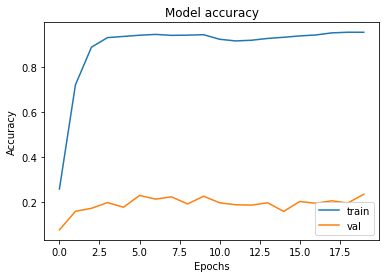

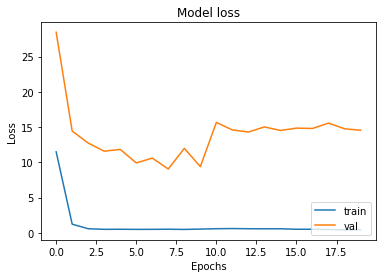

(0.9557, 0.2358)

In [20]:
plot(hist)

In [21]:
saver(model, hist, "mobilenet_unfrozen")

In [22]:
model.evaluate(test)

16/16 [==============================] - 15s 892ms/step - loss: 11.1857 - accuracy: 0.3381 - top_k_categorical_accuracy: 0.6564


[11.185694694519043, 0.3380809724330902, 0.6564217805862427]

### Efficient net v2

In [38]:
efficient_net= EfficientNetV2S(include_top = False, input_shape = (224,224,3))
efficient_net.trainable = False
ctr = 0
for layer in efficient_net.layers:
    if ctr > 508:
        layer.trainable = True
    ctr += 1    

for layer in efficient_net.layers:
    if layer.trainable:
        print(layer.name)


block6o_add
top_conv
top_bn
top_activation


In [39]:
x = Flatten()(efficient_net.output)
x = Dense(23,activation = "softmax")(x)
model = Model(efficient_net.input, x)
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy", "top_k_categorical_accuracy"])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_18 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_12 (Rescaling)       (None, 224, 224, 3)  0           ['input_18[0][0]']               
                                                                                                  
 stem_conv (Conv2D)             (None, 112, 112, 24  648         ['rescaling_12[0][0]']           
                                )                                                                 
                                                                                            

 block2c_expand_activation (Act  (None, 56, 56, 192)  0          ['block2c_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block2c_project_conv (Conv2D)  (None, 56, 56, 48)   9216        ['block2c_expand_activation[0][0]
                                                                 ']                               
                                                                                                  
 block2c_project_bn (BatchNorma  (None, 56, 56, 48)  192         ['block2c_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block2c_drop (Dropout)         (None, 56, 56, 48)   0           ['block2c_project_bn[0][0]']     
          

                                                                  'block3b_add[0][0]']            
                                                                                                  
 block3d_expand_conv (Conv2D)   (None, 28, 28, 256)  147456      ['block3c_add[0][0]']            
                                                                                                  
 block3d_expand_bn (BatchNormal  (None, 28, 28, 256)  1024       ['block3d_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block3d_expand_activation (Act  (None, 28, 28, 256)  0          ['block3d_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block3d_p

                                                                                                  
 block4b_project_conv (Conv2D)  (None, 14, 14, 128)  65536       ['block4b_se_excite[0][0]']      
                                                                                                  
 block4b_project_bn (BatchNorma  (None, 14, 14, 128)  512        ['block4b_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block4b_drop (Dropout)         (None, 14, 14, 128)  0           ['block4b_project_bn[0][0]']     
                                                                                                  
 block4b_add (Add)              (None, 14, 14, 128)  0           ['block4b_drop[0][0]',           
                                                                  'block4a_project_bn[0][0]']     
          

                                                                                                  
 block4d_drop (Dropout)         (None, 14, 14, 128)  0           ['block4d_project_bn[0][0]']     
                                                                                                  
 block4d_add (Add)              (None, 14, 14, 128)  0           ['block4d_drop[0][0]',           
                                                                  'block4c_add[0][0]']            
                                                                                                  
 block4e_expand_conv (Conv2D)   (None, 14, 14, 512)  65536       ['block4d_add[0][0]']            
                                                                                                  
 block4e_expand_bn (BatchNormal  (None, 14, 14, 512)  2048       ['block4e_expand_conv[0][0]']    
 ization)                                                                                         
          

                                                                                                  
 block5a_expand_conv (Conv2D)   (None, 14, 14, 768)  98304       ['block4f_add[0][0]']            
                                                                                                  
 block5a_expand_bn (BatchNormal  (None, 14, 14, 768)  3072       ['block5a_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block5a_expand_activation (Act  (None, 14, 14, 768)  0          ['block5a_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block5a_dwconv2 (DepthwiseConv  (None, 14, 14, 768)  6912       ['block5a_expand_activation[0][0]
 2D)      

 2D)                                                             ']                               
                                                                                                  
 block5c_bn (BatchNormalization  (None, 14, 14, 960)  3840       ['block5c_dwconv2[0][0]']        
 )                                                                                                
                                                                                                  
 block5c_activation (Activation  (None, 14, 14, 960)  0          ['block5c_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block5c_se_squeeze (GlobalAver  (None, 960)         0           ['block5c_activation[0][0]']     
 agePooling2D)                                                                                    
          

 block5e_activation (Activation  (None, 14, 14, 960)  0          ['block5e_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block5e_se_squeeze (GlobalAver  (None, 960)         0           ['block5e_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5e_se_reshape (Reshape)   (None, 1, 1, 960)    0           ['block5e_se_squeeze[0][0]']     
                                                                                                  
 block5e_se_reduce (Conv2D)     (None, 1, 1, 40)     38440       ['block5e_se_reshape[0][0]']     
                                                                                                  
 block5e_s

                                                                                                  
 block5g_se_reshape (Reshape)   (None, 1, 1, 960)    0           ['block5g_se_squeeze[0][0]']     
                                                                                                  
 block5g_se_reduce (Conv2D)     (None, 1, 1, 40)     38440       ['block5g_se_reshape[0][0]']     
                                                                                                  
 block5g_se_expand (Conv2D)     (None, 1, 1, 960)    39360       ['block5g_se_reduce[0][0]']      
                                                                                                  
 block5g_se_excite (Multiply)   (None, 14, 14, 960)  0           ['block5g_activation[0][0]',     
                                                                  'block5g_se_expand[0][0]']      
                                                                                                  
 block5g_p

 block5i_se_expand (Conv2D)     (None, 1, 1, 960)    39360       ['block5i_se_reduce[0][0]']      
                                                                                                  
 block5i_se_excite (Multiply)   (None, 14, 14, 960)  0           ['block5i_activation[0][0]',     
                                                                  'block5i_se_expand[0][0]']      
                                                                                                  
 block5i_project_conv (Conv2D)  (None, 14, 14, 160)  153600      ['block5i_se_excite[0][0]']      
                                                                                                  
 block5i_project_bn (BatchNorma  (None, 14, 14, 160)  640        ['block5i_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block5i_d

 block6b_drop (Dropout)         (None, 7, 7, 256)    0           ['block6b_project_bn[0][0]']     
                                                                                                  
 block6b_add (Add)              (None, 7, 7, 256)    0           ['block6b_drop[0][0]',           
                                                                  'block6a_project_bn[0][0]']     
                                                                                                  
 block6c_expand_conv (Conv2D)   (None, 7, 7, 1536)   393216      ['block6b_add[0][0]']            
                                                                                                  
 block6c_expand_bn (BatchNormal  (None, 7, 7, 1536)  6144        ['block6c_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block6c_e

 block6e_expand_conv (Conv2D)   (None, 7, 7, 1536)   393216      ['block6d_add[0][0]']            
                                                                                                  
 block6e_expand_bn (BatchNormal  (None, 7, 7, 1536)  6144        ['block6e_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block6e_expand_activation (Act  (None, 7, 7, 1536)  0           ['block6e_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block6e_dwconv2 (DepthwiseConv  (None, 7, 7, 1536)  13824       ['block6e_expand_activation[0][0]
 2D)                                                             ']                               
          

 block6g_expand_activation (Act  (None, 7, 7, 1536)  0           ['block6g_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block6g_dwconv2 (DepthwiseConv  (None, 7, 7, 1536)  13824       ['block6g_expand_activation[0][0]
 2D)                                                             ']                               
                                                                                                  
 block6g_bn (BatchNormalization  (None, 7, 7, 1536)  6144        ['block6g_dwconv2[0][0]']        
 )                                                                                                
                                                                                                  
 block6g_activation (Activation  (None, 7, 7, 1536)  0           ['block6g_bn[0][0]']             
 )        

                                                                                                  
 block6i_bn (BatchNormalization  (None, 7, 7, 1536)  6144        ['block6i_dwconv2[0][0]']        
 )                                                                                                
                                                                                                  
 block6i_activation (Activation  (None, 7, 7, 1536)  0           ['block6i_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block6i_se_squeeze (GlobalAver  (None, 1536)        0           ['block6i_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block6i_s

 )                                                                                                
                                                                                                  
 block6k_se_squeeze (GlobalAver  (None, 1536)        0           ['block6k_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block6k_se_reshape (Reshape)   (None, 1, 1, 1536)   0           ['block6k_se_squeeze[0][0]']     
                                                                                                  
 block6k_se_reduce (Conv2D)     (None, 1, 1, 64)     98368       ['block6k_se_reshape[0][0]']     
                                                                                                  
 block6k_se_expand (Conv2D)     (None, 1, 1, 1536)   99840       ['block6k_se_reduce[0][0]']      
          

 block6m_se_reshape (Reshape)   (None, 1, 1, 1536)   0           ['block6m_se_squeeze[0][0]']     
                                                                                                  
 block6m_se_reduce (Conv2D)     (None, 1, 1, 64)     98368       ['block6m_se_reshape[0][0]']     
                                                                                                  
 block6m_se_expand (Conv2D)     (None, 1, 1, 1536)   99840       ['block6m_se_reduce[0][0]']      
                                                                                                  
 block6m_se_excite (Multiply)   (None, 7, 7, 1536)   0           ['block6m_activation[0][0]',     
                                                                  'block6m_se_expand[0][0]']      
                                                                                                  
 block6m_project_conv (Conv2D)  (None, 7, 7, 256)    393216      ['block6m_se_excite[0][0]']      
          

                                                                                                  
 block6o_se_excite (Multiply)   (None, 7, 7, 1536)   0           ['block6o_activation[0][0]',     
                                                                  'block6o_se_expand[0][0]']      
                                                                                                  
 block6o_project_conv (Conv2D)  (None, 7, 7, 256)    393216      ['block6o_se_excite[0][0]']      
                                                                                                  
 block6o_project_bn (BatchNorma  (None, 7, 7, 256)   1024        ['block6o_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block6o_drop (Dropout)         (None, 7, 7, 256)    0           ['block6o_project_bn[0][0]']     
          

In [40]:
hist = model.fit(train, validation_data = val, batch_size = batches, epochs = 20)

Epoch 1/20


2023-02-12 23:34:01.520997: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


49/49 [==============================] - ETA: 0s - loss: 26.9141 - accuracy: 0.0784 - top_k_categorical_accuracy: 0.2787

2023-02-12 23:36:42.350764: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


49/49 [==============================] - 205s 4s/step - loss: 26.9141 - accuracy: 0.0784 - top_k_categorical_accuracy: 0.2787 - val_loss: 6.3780 - val_accuracy: 0.0615 - val_top_k_categorical_accuracy: 0.2835
Epoch 2/20
49/49 [==============================] - 193s 4s/step - loss: 3.8737 - accuracy: 0.1196 - top_k_categorical_accuracy: 0.4034 - val_loss: 4.0493 - val_accuracy: 0.0979 - val_top_k_categorical_accuracy: 0.3898
Epoch 3/20
49/49 [==============================] - 193s 4s/step - loss: 4.1907 - accuracy: 0.1321 - top_k_categorical_accuracy: 0.4331 - val_loss: 5.0406 - val_accuracy: 0.1092 - val_top_k_categorical_accuracy: 0.3715
Epoch 4/20
49/49 [==============================] - 198s 4s/step - loss: 3.9148 - accuracy: 0.1445 - top_k_categorical_accuracy: 0.4671 - val_loss: 5.2228 - val_accuracy: 0.0986 - val_top_k_categorical_accuracy: 0.3963
Epoch 5/20
49/49 [==============================] - 199s 4s/step - loss: 3.2850 - accuracy: 0.1757 - top_k_categorical_accuracy: 0.504

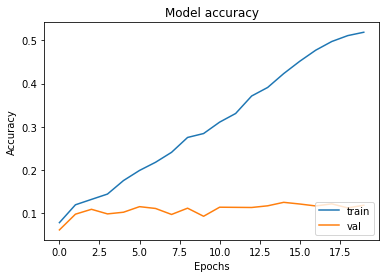

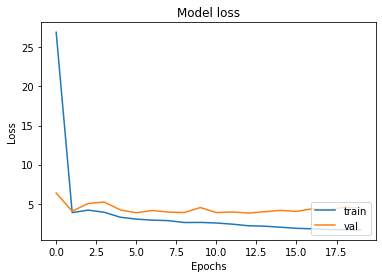

(0.5187, 0.1186)

In [41]:
plot(hist)

In [42]:
saver(model, hist, "efficient_netV2_unfrozen")

In [43]:
model.evaluate(test)

16/16 [==============================] - 52s 3s/step - loss: 4.0056 - accuracy: 0.1709 - top_k_categorical_accuracy: 0.4670


[4.005605220794678, 0.17091454565525055, 0.4670165181159973]

## Completely training densenet

In [7]:
densenet= DenseNet121(include_top = False, input_shape = (224,224,3))
densenet.trainable = False
for layer in densenet.layers:
    if "block16" in layer.name and "conv" in layer.name[-7:]:
       layer.trainable = True
for layer in densenet.layers:
    if layer.trainable:
        print(layer.name)

Metal device set to: Apple M1


2023-02-13 13:28:49.905176: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-13 13:28:49.905556: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


conv4_block16_1_conv
conv4_block16_2_conv
conv5_block16_1_conv
conv5_block16_2_conv


In [8]:

x = Flatten()(densenet.output)
x = Dense(23,activation = "softmax")(x)
model = Model(densenet.input, x)
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                              

 n)                                                                                               
                                                                                                  
 conv2_block4_1_conv (Conv2D)   (None, 56, 56, 128)  20480       ['conv2_block4_0_relu[0][0]']    
                                                                                                  
 conv2_block4_1_bn (BatchNormal  (None, 56, 56, 128)  512        ['conv2_block4_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block4_1_relu (Activatio  (None, 56, 56, 128)  0          ['conv2_block4_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_blo

 conv3_block2_0_relu (Activatio  (None, 28, 28, 160)  0          ['conv3_block2_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block2_1_conv (Conv2D)   (None, 28, 28, 128)  20480       ['conv3_block2_0_relu[0][0]']    
                                                                                                  
 conv3_block2_1_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block2_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block2_1_bn[0][0]']      
 n)                                                                                               
          

                                                                                                  
 conv3_block6_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block6_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block6_2_conv (Conv2D)   (None, 28, 28, 32)   36864       ['conv3_block6_1_relu[0][0]']    
                                                                                                  
 conv3_block6_concat (Concatena  (None, 28, 28, 320)  0          ['conv3_block5_concat[0][0]',    
 te)                                                              'conv3_block6_2_conv[0][0]']    
                                                                                                  
 conv3_block7_0_bn (BatchNormal  (None, 28, 28, 320)  1280       ['conv3_block6_concat[0][0]']    
 ization) 

 ate)                                                             'conv3_block10_2_conv[0][0]']   
                                                                                                  
 conv3_block11_0_bn (BatchNorma  (None, 28, 28, 448)  1792       ['conv3_block10_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv3_block11_0_relu (Activati  (None, 28, 28, 448)  0          ['conv3_block11_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv3_block11_1_conv (Conv2D)  (None, 28, 28, 128)  57344       ['conv3_block11_0_relu[0][0]']   
                                                                                                  
 conv3_blo

 conv4_block2_concat (Concatena  (None, 14, 14, 320)  0          ['conv4_block1_concat[0][0]',    
 te)                                                              'conv4_block2_2_conv[0][0]']    
                                                                                                  
 conv4_block3_0_bn (BatchNormal  (None, 14, 14, 320)  1280       ['conv4_block2_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block3_0_relu (Activatio  (None, 14, 14, 320)  0          ['conv4_block3_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block3_1_conv (Conv2D)   (None, 14, 14, 128)  40960       ['conv4_block3_0_relu[0][0]']    
          

 n)                                                                                               
                                                                                                  
 conv4_block7_1_conv (Conv2D)   (None, 14, 14, 128)  57344       ['conv4_block7_0_relu[0][0]']    
                                                                                                  
 conv4_block7_1_bn (BatchNormal  (None, 14, 14, 128)  512        ['conv4_block7_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block7_1_relu (Activatio  (None, 14, 14, 128)  0          ['conv4_block7_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_blo

 conv4_block11_1_relu (Activati  (None, 14, 14, 128)  0          ['conv4_block11_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block11_2_conv (Conv2D)  (None, 14, 14, 32)   36864       ['conv4_block11_1_relu[0][0]']   
                                                                                                  
 conv4_block11_concat (Concaten  (None, 14, 14, 608)  0          ['conv4_block10_concat[0][0]',   
 ate)                                                             'conv4_block11_2_conv[0][0]']   
                                                                                                  
 conv4_block12_0_bn (BatchNorma  (None, 14, 14, 608)  2432       ['conv4_block11_concat[0][0]']   
 lization)                                                                                        
          

                                                                                                  
 conv4_block16_0_bn (BatchNorma  (None, 14, 14, 736)  2944       ['conv4_block15_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block16_0_relu (Activati  (None, 14, 14, 736)  0          ['conv4_block16_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block16_1_conv (Conv2D)  (None, 14, 14, 128)  94208       ['conv4_block16_0_relu[0][0]']   
                                                                                                  
 conv4_block16_1_bn (BatchNorma  (None, 14, 14, 128)  512        ['conv4_block16_1_conv[0][0]']   
 lization)

 conv4_block20_1_conv (Conv2D)  (None, 14, 14, 128)  110592      ['conv4_block20_0_relu[0][0]']   
                                                                                                  
 conv4_block20_1_bn (BatchNorma  (None, 14, 14, 128)  512        ['conv4_block20_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block20_1_relu (Activati  (None, 14, 14, 128)  0          ['conv4_block20_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block20_2_conv (Conv2D)  (None, 14, 14, 32)   36864       ['conv4_block20_1_relu[0][0]']   
                                                                                                  
 conv4_blo

                                                                                                  
 conv4_block24_2_conv (Conv2D)  (None, 14, 14, 32)   36864       ['conv4_block24_1_relu[0][0]']   
                                                                                                  
 conv4_block24_concat (Concaten  (None, 14, 14, 1024  0          ['conv4_block23_concat[0][0]',   
 ate)                           )                                 'conv4_block24_2_conv[0][0]']   
                                                                                                  
 pool4_bn (BatchNormalization)  (None, 14, 14, 1024  4096        ['conv4_block24_concat[0][0]']   
                                )                                                                 
                                                                                                  
 pool4_relu (Activation)        (None, 14, 14, 1024  0           ['pool4_bn[0][0]']               
          

                                                                                                  
 conv5_block4_1_relu (Activatio  (None, 7, 7, 128)   0           ['conv5_block4_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block4_2_conv (Conv2D)   (None, 7, 7, 32)     36864       ['conv5_block4_1_relu[0][0]']    
                                                                                                  
 conv5_block4_concat (Concatena  (None, 7, 7, 640)   0           ['conv5_block3_concat[0][0]',    
 te)                                                              'conv5_block4_2_conv[0][0]']    
                                                                                                  
 conv5_block5_0_bn (BatchNormal  (None, 7, 7, 640)   2560        ['conv5_block4_concat[0][0]']    
 ization) 

 te)                                                              'conv5_block8_2_conv[0][0]']    
                                                                                                  
 conv5_block9_0_bn (BatchNormal  (None, 7, 7, 768)   3072        ['conv5_block8_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block9_0_relu (Activatio  (None, 7, 7, 768)   0           ['conv5_block9_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block9_1_conv (Conv2D)   (None, 7, 7, 128)    98304       ['conv5_block9_0_relu[0][0]']    
                                                                                                  
 conv5_blo

                                                                                                  
 conv5_block13_1_conv (Conv2D)  (None, 7, 7, 128)    114688      ['conv5_block13_0_relu[0][0]']   
                                                                                                  
 conv5_block13_1_bn (BatchNorma  (None, 7, 7, 128)   512         ['conv5_block13_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv5_block13_1_relu (Activati  (None, 7, 7, 128)   0           ['conv5_block13_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_block13_2_conv (Conv2D)  (None, 7, 7, 32)     36864       ['conv5_block13_1_relu[0][0]']   
          

In [9]:
hist = model.fit(train, validation_data = val, batch_size = batches, epochs = 20)

Epoch 1/20


2023-02-13 13:28:58.572080: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-02-13 13:29:00.925728: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


49/49 [==============================] - ETA: 0s - loss: 3.6404 - accuracy: 0.2171

2023-02-13 13:32:32.714774: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


49/49 [==============================] - 251s 5s/step - loss: 3.6404 - accuracy: 0.2171 - val_loss: 2.8549 - val_accuracy: 0.2258
Epoch 2/20
49/49 [==============================] - 238s 5s/step - loss: 1.9549 - accuracy: 0.4201 - val_loss: 2.8797 - val_accuracy: 0.2378
Epoch 3/20
49/49 [==============================] - 233s 5s/step - loss: 1.4325 - accuracy: 0.5727 - val_loss: 2.8781 - val_accuracy: 0.2452
Epoch 4/20
49/49 [==============================] - 246s 5s/step - loss: 1.0703 - accuracy: 0.6923 - val_loss: 2.9339 - val_accuracy: 0.2590
Epoch 5/20
49/49 [==============================] - 247s 5s/step - loss: 0.7923 - accuracy: 0.7878 - val_loss: 3.1259 - val_accuracy: 0.2658
Epoch 6/20
49/49 [==============================] - 247s 5s/step - loss: 0.6041 - accuracy: 0.8503 - val_loss: 3.2580 - val_accuracy: 0.2661
Epoch 7/20
49/49 [==============================] - 250s 5s/step - loss: 0.4626 - accuracy: 0.8928 - val_loss: 3.5520 - val_accuracy: 0.2706
Epoch 8/20
49/49 [======

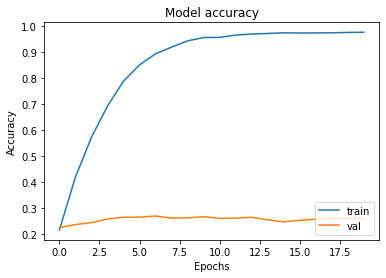

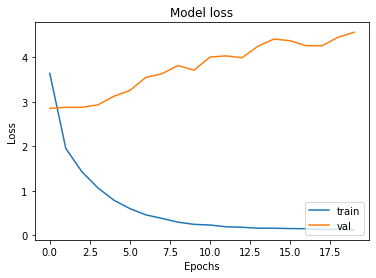

(0.9757, 0.261)

In [10]:
plot(hist)

In [11]:
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy", "top_k_categorical_accuracy"])


In [12]:
model.evaluate(test)

2023-02-13 15:01:52.456824: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 48s 3s/step - loss: 3.3043 - accuracy: 0.4023 - top_k_categorical_accuracy: 0.7134


[3.3042972087860107, 0.40229886770248413, 0.7133933305740356]

### Trying resnet 101

In [24]:
resnet= ResNet101(include_top = False, input_shape = (224,224,3))
resnet.trainable = False

for layer in resnet.layers[-4:]:
    if "conv5_block3" in layer.name:
       layer.trainable = True
for layer in resnet.layers:
    if layer.trainable:
        print(layer.name)


conv5_block3_3_conv
conv5_block3_3_bn
conv5_block3_add
conv5_block3_out


In [25]:

x = Flatten()(resnet.output)
x = Dense(23,activation = "softmax")(x)
model = Model(resnet.input, x)
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_5[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                                                  
 conv4_block8_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block7_out[0][0]']       
                                                                                                  
 conv4_block8_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block8_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block8_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block8_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block8_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block8_1_relu[0][0]']    
          

                                )                                                                 
                                                                                                  
 conv4_block11_1_conv (Conv2D)  (None, 14, 14, 256)  262400      ['conv4_block10_out[0][0]']      
                                                                                                  
 conv4_block11_1_bn (BatchNorma  (None, 14, 14, 256)  1024       ['conv4_block11_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block11_1_relu (Activati  (None, 14, 14, 256)  0          ['conv4_block11_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_blo

 conv4_block13_out (Activation)  (None, 14, 14, 1024  0          ['conv4_block13_add[0][0]']      
                                )                                                                 
                                                                                                  
 conv4_block14_1_conv (Conv2D)  (None, 14, 14, 256)  262400      ['conv4_block13_out[0][0]']      
                                                                                                  
 conv4_block14_1_bn (BatchNorma  (None, 14, 14, 256)  1024       ['conv4_block14_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block14_1_relu (Activati  (None, 14, 14, 256)  0          ['conv4_block14_1_bn[0][0]']     
 on)                                                                                              
          

                                                                                                  
 conv4_block16_out (Activation)  (None, 14, 14, 1024  0          ['conv4_block16_add[0][0]']      
                                )                                                                 
                                                                                                  
 conv4_block17_1_conv (Conv2D)  (None, 14, 14, 256)  262400      ['conv4_block16_out[0][0]']      
                                                                                                  
 conv4_block17_1_bn (BatchNorma  (None, 14, 14, 256)  1024       ['conv4_block17_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block17_1_relu (Activati  (None, 14, 14, 256)  0          ['conv4_block17_1_bn[0][0]']     
 on)      

                                )                                 'conv4_block19_3_bn[0][0]']     
                                                                                                  
 conv4_block19_out (Activation)  (None, 14, 14, 1024  0          ['conv4_block19_add[0][0]']      
                                )                                                                 
                                                                                                  
 conv4_block20_1_conv (Conv2D)  (None, 14, 14, 256)  262400      ['conv4_block19_out[0][0]']      
                                                                                                  
 conv4_block20_1_bn (BatchNorma  (None, 14, 14, 256)  1024       ['conv4_block20_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_blo

 conv4_block22_add (Add)        (None, 14, 14, 1024  0           ['conv4_block21_out[0][0]',      
                                )                                 'conv4_block22_3_bn[0][0]']     
                                                                                                  
 conv4_block22_out (Activation)  (None, 14, 14, 1024  0          ['conv4_block22_add[0][0]']      
                                )                                                                 
                                                                                                  
 conv4_block23_1_conv (Conv2D)  (None, 14, 14, 256)  262400      ['conv4_block22_out[0][0]']      
                                                                                                  
 conv4_block23_1_bn (BatchNorma  (None, 14, 14, 256)  1024       ['conv4_block23_1_conv[0][0]']   
 lization)                                                                                        
          

 conv5_block2_3_bn (BatchNormal  (None, 7, 7, 2048)  8192        ['conv5_block2_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_add (Add)         (None, 7, 7, 2048)   0           ['conv5_block1_out[0][0]',       
                                                                  'conv5_block2_3_bn[0][0]']      
                                                                                                  
 conv5_block2_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block2_add[0][0]']       
                                                                                                  
 conv5_block3_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block2_out[0][0]']       
                                                                                                  
 conv5_blo

In [26]:
hist = model.fit(train, validation_data = val, batch_size = batches, epochs = 20)

Epoch 1/20


2023-02-13 15:13:27.633887: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


49/49 [==============================] - ETA: 0s - loss: 7.3297 - accuracy: 0.0811

2023-02-13 15:17:22.395924: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


49/49 [==============================] - 297s 6s/step - loss: 7.3297 - accuracy: 0.0811 - val_loss: 17.5240 - val_accuracy: 0.0390
Epoch 2/20
49/49 [==============================] - 308s 6s/step - loss: 2.8981 - accuracy: 0.1481 - val_loss: 7.8079 - val_accuracy: 0.0383
Epoch 3/20
49/49 [==============================] - 300s 6s/step - loss: 2.7661 - accuracy: 0.1822 - val_loss: 3.7954 - val_accuracy: 0.0425
Epoch 4/20
49/49 [==============================] - 306s 6s/step - loss: 2.7217 - accuracy: 0.1988 - val_loss: 3.3318 - val_accuracy: 0.0573
Epoch 5/20
49/49 [==============================] - 321s 7s/step - loss: 2.6978 - accuracy: 0.2033 - val_loss: 3.4315 - val_accuracy: 0.1115
Epoch 6/20
49/49 [==============================] - 325s 7s/step - loss: 2.6239 - accuracy: 0.2208 - val_loss: 3.2359 - val_accuracy: 0.1128
Epoch 7/20
49/49 [==============================] - 328s 7s/step - loss: 2.6040 - accuracy: 0.2334 - val_loss: 3.3290 - val_accuracy: 0.0999
Epoch 8/20
49/49 [=====

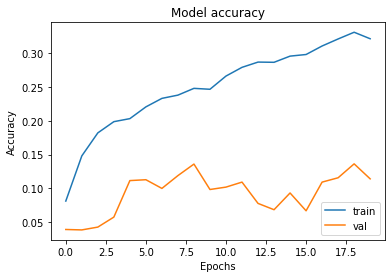

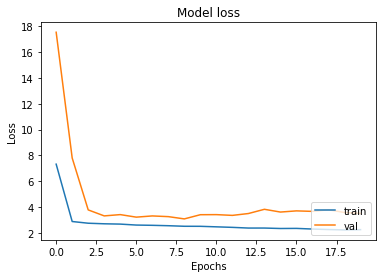

(0.3218, 0.114)

In [27]:
plot(hist)

In [28]:
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy", "top_k_categorical_accuracy"])


In [29]:
model.evaluate(test)

2023-02-13 17:12:55.098652: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 74s 4s/step - loss: 3.3396 - accuracy: 0.1469 - top_k_categorical_accuracy: 0.4693


[3.33955979347229, 0.14692653715610504, 0.4692653715610504]

In [30]:
saver(model, hist, "resnet101")

### Trying resnet 50v2

In [5]:
resnet= ResNet50V2(include_top = False, input_shape = (224,224,3))
resnet.trainable = False

for layer in resnet.layers[-6:]:
    if "conv5_block3" in layer.name:
       layer.trainable = True
for layer in resnet.layers:
    if layer.trainable:
        print(layer.name)


Metal device set to: Apple M1


2023-02-13 17:20:14.130655: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-13 17:20:14.130853: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


conv5_block3_2_bn
conv5_block3_2_relu
conv5_block3_3_conv
conv5_block3_out


In [6]:

x = Flatten()(resnet.output)
x = Dense(23,activation = "softmax")(x)
model = Model(resnet.input, x)
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

                                                                                                  
 conv2_block3_preact_relu (Acti  (None, 56, 56, 256)  0          ['conv2_block3_preact_bn[0][0]'] 
 vation)                                                                                          
                                                                                                  
 conv2_block3_1_conv (Conv2D)   (None, 56, 56, 64)   16384       ['conv2_block3_preact_relu[0][0]'
                                                                 ]                                
                                                                                                  
 conv2_block3_1_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_blo

 conv3_block2_2_conv (Conv2D)   (None, 28, 28, 128)  147456      ['conv3_block2_2_pad[0][0]']     
                                                                                                  
 conv3_block2_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block2_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block2_3_conv (Conv2D)   (None, 28, 28, 512)  66048       ['conv3_block2_2_relu[0][0]']    
                                                                                                  
 conv3_blo

 conv4_block1_1_conv (Conv2D)   (None, 14, 14, 256)  131072      ['conv4_block1_preact_relu[0][0]'
                                                                 ]                                
                                                                                                  
 conv4_block1_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block1_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block1_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block1_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block1_2_pad (ZeroPaddin  (None, 16, 16, 256)  0          ['conv4_block1_1_relu[0][0]']    
 g2D)     

                                                                                                  
 conv4_block3_2_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block3_3_conv (Conv2D)   (None, 14, 14, 1024  263168      ['conv4_block3_2_relu[0][0]']    
                                )                                                                 
                                                                                                  
 conv4_block3_out (Add)         (None, 14, 14, 1024  0           ['conv4_block2_out[0][0]',       
                                )                                 'conv4_block3_3_conv[0][0]']    
                                                                                                  
 conv4_blo

 conv4_block6_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block6_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block6_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block6_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block6_2_pad (ZeroPaddin  (None, 16, 16, 256)  0          ['conv4_block6_1_relu[0][0]']    
 g2D)                                                                                             
                                                                                                  
 conv4_block6_2_conv (Conv2D)   (None, 7, 7, 256)    589824      ['conv4_block6_2_pad[0][0]']     
          

                                                                                                  
 conv5_block2_3_conv (Conv2D)   (None, 7, 7, 2048)   1050624     ['conv5_block2_2_relu[0][0]']    
                                                                                                  
 conv5_block2_out (Add)         (None, 7, 7, 2048)   0           ['conv5_block1_out[0][0]',       
                                                                  'conv5_block2_3_conv[0][0]']    
                                                                                                  
 conv5_block3_preact_bn (BatchN  (None, 7, 7, 2048)  8192        ['conv5_block2_out[0][0]']       
 ormalization)                                                                                    
                                                                                                  
 conv5_block3_preact_relu (Acti  (None, 7, 7, 2048)  0           ['conv5_block3_preact_bn[0][0]'] 
 vation)  

In [7]:
hist = model.fit(train, validation_data = val, batch_size = batches, epochs = 20)

Epoch 1/20


2023-02-13 17:20:20.433690: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-02-13 17:20:21.636764: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


49/49 [==============================] - ETA: 0s - loss: 3.8847 - accuracy: 0.2350

2023-02-13 17:22:24.952550: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


49/49 [==============================] - 155s 3s/step - loss: 3.8847 - accuracy: 0.2350 - val_loss: 2.7681 - val_accuracy: 0.1988
Epoch 2/20
49/49 [==============================] - 157s 3s/step - loss: 1.5701 - accuracy: 0.5300 - val_loss: 3.0293 - val_accuracy: 0.2291
Epoch 3/20
49/49 [==============================] - 163s 3s/step - loss: 0.8068 - accuracy: 0.7698 - val_loss: 3.4197 - val_accuracy: 0.2471
Epoch 4/20
49/49 [==============================] - 165s 3s/step - loss: 0.3814 - accuracy: 0.9121 - val_loss: 3.8820 - val_accuracy: 0.2461
Epoch 5/20
49/49 [==============================] - 175s 4s/step - loss: 0.2423 - accuracy: 0.9553 - val_loss: 3.9806 - val_accuracy: 0.2484
Epoch 6/20
49/49 [==============================] - 169s 3s/step - loss: 0.1728 - accuracy: 0.9684 - val_loss: 4.0690 - val_accuracy: 0.2497
Epoch 7/20
49/49 [==============================] - 169s 3s/step - loss: 0.1471 - accuracy: 0.9737 - val_loss: 4.1415 - val_accuracy: 0.2684
Epoch 8/20
49/49 [======

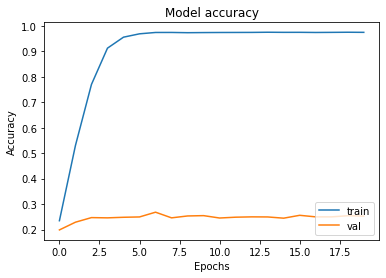

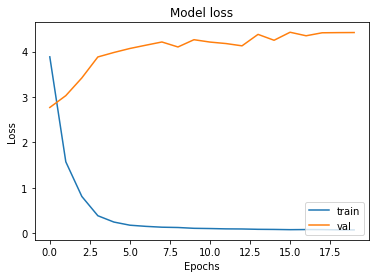

(0.9742, 0.2529)

In [10]:
plot(hist)

In [11]:
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy", "top_k_categorical_accuracy"])


In [12]:
model.evaluate(test)

2023-02-13 18:18:51.892447: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 44s 3s/step - loss: 3.1352 - accuracy: 0.3966 - top_k_categorical_accuracy: 0.6989


[3.1351916790008545, 0.3965517282485962, 0.698900580406189]

In [13]:
saver(model, hist, "resnet50v2")

## Performing ensembles

In [7]:
model_path= "/Users/praksj/Documents/VIT/Year-3/sem 6/TARP/DATA/dermnet_saves/models/"

### Loading models

In [9]:
resnet50v2 = load_model(model_path +"resnet50v2.h5" ) 
densenet_unfrozen = load_model(model_path +"densenet_unfrozen.h5" ) 
base_cnn = load_model(model_path + "base_cnn.h5")

In [13]:
models = [resnet50v2, densenet_unfrozen,base_cnn]
model_input = Input(shape=(224, 224, 3))
model_outputs = [model(model_input) for model in models]
ensemble_output = Average()(model_outputs)
ensemble_model = Model(inputs=model_input, outputs=ensemble_output)

In [14]:
ensemble_model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy", "top_k_categorical_accuracy"])


In [18]:
ensemble_model.evaluate(test)

16/16 [==============================] - 96s 6s/step - loss: 2.1539 - accuracy: 0.4538 - top_k_categorical_accuracy: 0.7354


[2.153933048248291, 0.4537731111049652, 0.7353823184967041]

### Model summary

Mobilenet Unfrozen:loss: 11.1857 - accuracy: 0.3381 - top_k_categorical_accuracy: 0.6564

Efficientnetv2 unfrozen: loss: 4.0056 - accuracy: 0.1709 - top_k_categorical_accuracy: 0.4670

Resnet101 unfrozen:loss: 3.3396 - accuracy: 0.1469 - top_k_categorical_accuracy: 0.4693

Resnet50V2 Unfrozen:loss: 3.1352 - accuracy: 0.3966 - top_k_categorical_accuracy: 0.6989


## Reference

https://stackoverflow.com/questions/67647843/is-there-a-way-to-ensemble-two-keras-h5-models-trained-for-same-classes

### Feature enhancement: 